<a href="https://colab.research.google.com/github/srishtiiiiiii/NIS-SYSTEM/blob/maincode/mains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
data = pd.read_csv('Test_data.csv')
data = pd.read_csv('Train_data.csv')
data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# Step 2: Data Preprocessing
# Handle missing values if any
data = data.fillna(method='ffill')

# Encode categorical features
label_encoders = {}
for column in ['protocol_type', 'service', 'flag', 'class']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split features and target
X = data.drop('class', axis=1)
y = data['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-27-bea081055dd3>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [ ]:
# Step 3: Training model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# Step 4: Model Selection and Training

# A. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.997618417570786
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       1.00      1.00      1.00      4042

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



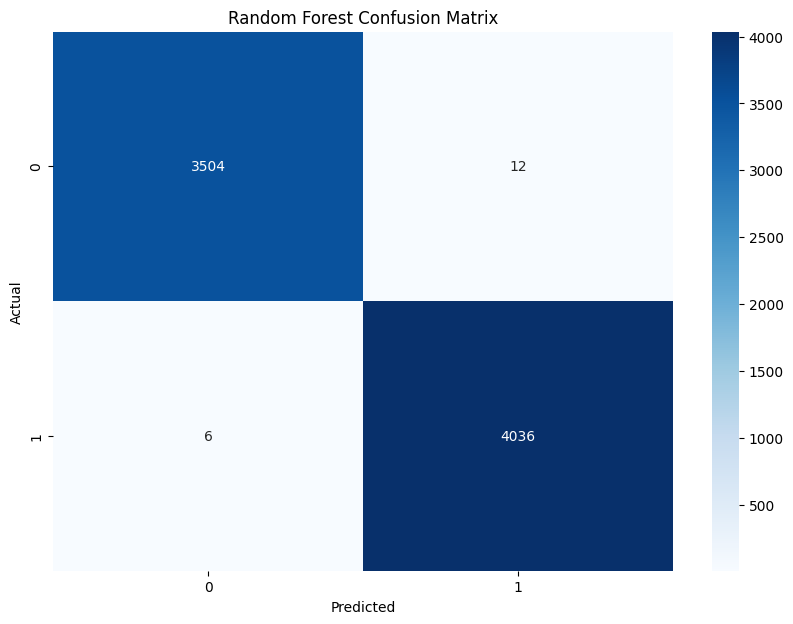

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# B. Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies
y_pred_iforest = iso_forest.predict(X_test)
# Convert predictions to binary (1 for normal, -1 for anomaly)
y_pred_iforest = [1 if x == -1 else 0 for x in y_pred_iforest]

# Evaluate Isolation Forest
print("Isolation Forest Classification Report:\n", classification_report(y_test, y_pred_iforest))



Isolation Forest Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.86      0.59      3516
           1       0.35      0.06      0.11      4042

    accuracy                           0.44      7558
   macro avg       0.40      0.46      0.35      7558
weighted avg       0.39      0.44      0.33      7558



In [ ]:
# C. Deep Learning Model with Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multiclass
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict and evaluate the neural network model
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("Deep Learning Model Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Deep Learning Model Classification Report:\n", classification_report(y_test, y_pred_nn))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8968 - loss: 0.2331 - val_accuracy: 0.9757 - val_loss: 0.0664
Epoch 2/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9781 - loss: 0.0596 - val_accuracy: 0.9811 - val_loss: 0.0442
Epoch 3/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9860 - loss: 0.0417 - val_accuracy: 0.9868 - val_loss: 0.0367
Epoch 4/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9889 - loss: 0.0301 - val_accuracy: 0.9872 - val_loss: 0.0357
Epoch 5/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9906 - loss: 0.0263 - val_accuracy: 0.9890 - val_loss: 0.0300
Epoch 6/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9903 - loss: 0.0262 - val_accuracy: 0.9897 - val_loss: 0.0300
Epoch 7/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9902 - loss: 0.0288 - val_accuracy: 0.9903 - val_loss: 0.0284
Epoch 8/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9923 - loss: 0.0210 - val_accuracy: 0.

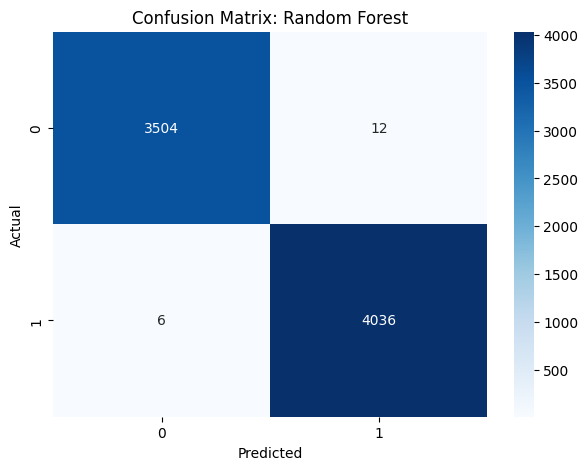

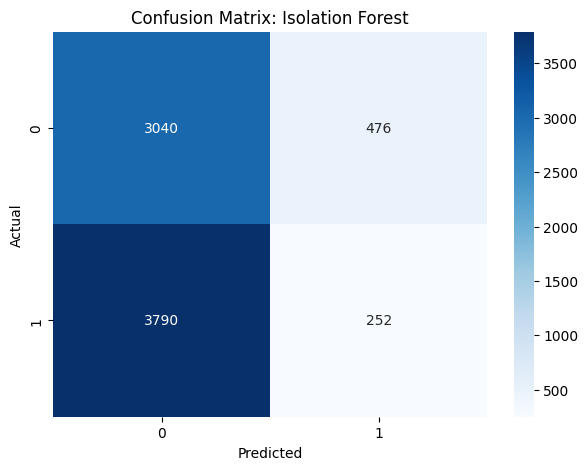

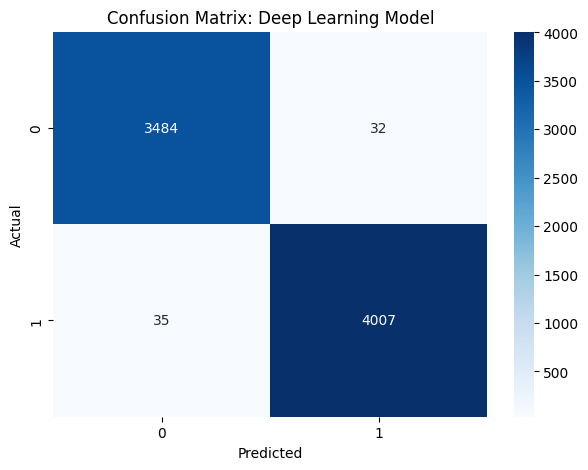

In [ ]:
# Step 5: Visualize Confusion Matrices for All Models
def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_iforest, 'Isolation Forest')
plot_confusion_matrix(y_test, y_pred_nn, 'Deep Learning Model')